# Trabajo Práctico N° 2: Redes Neuronales
## Natalia Mellino - Introducción al Aprendizaje Automatizado

In [1]:
# imports here

import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from copy import deepcopy
import matplotlib.pyplot as plt
import espirales_anidadas
from sklearn.model_selection import train_test_split

In [2]:
#defino parámetros de la red
epocas_por_entrenamiento=25    #numero de epocas que entrena cada vez
eta=0.01              #learning rate
alfa=0.9               #momentum
N2=60                 #neuronas en la capa oculta

#defino MLP para regresión
regr = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
#defino MLP para clasificación
clasif = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
print(regr)

MLPRegressor(activation='logistic', alpha=0.0, batch_size=1,
             hidden_layer_sizes=(60,), learning_rate_init=0.01, max_iter=25,
             nesterovs_momentum=False, solver='sgd', tol=0.0, warm_start=True)


In [3]:
# Entrenar red para REGRESION

def entrenar_red_regresion(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    error_train = None
    error_val = None
    error_test = None
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.mean_squared_error(y_train, pred_train)
        current_error_val = sk.metrics.mean_squared_error(y_val, pred_val)
        current_error_test = sk.metrics.mean_squared_error(y_test, pred_test)

        if error_val is None or current_error_val < error_val:
            best_red = deepcopy(model)
            error_train = current_error_train
            error_test = current_error_test
            error_val = current_error_val

    return best_red, error_train, error_val, error_test

In [10]:
# Entrenar red para CLASIFICACIÓN

def entrenar_red_clasificacion(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    error_train = None
    error_val = None
    error_test = None
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.zero_one_loss(y_train, pred_train)
        current_error_val = sk.metrics.zero_one_loss(y_val, pred_val)
        current_error_test = sk.metrics.zero_one_loss(y_test, pred_test)

        if error_val is None or current_error_val < error_val:
            best_red = deepcopy(model)
            error_train = current_error_train
            error_test = current_error_test
            error_val = current_error_val

    return best_red, error_train, error_val, error_test

In [30]:
# Función para graficar errores y predicciones

# regr, e_train, e_val, e_test = entrenar_red_regresion(regr, epocas, X_train, y_train, X_val, y_val, X_test, y_test)

def graficar_errores(e_train, e_val, e_test, epocas):
    plt.plot(range(epocas), e_train, label="train", linestyle=":")
    plt.plot(range(epocas), e_val, label="validacion", linestyle="-.")
    plt.plot(range(epocas), e_test, label="test", linestyle="-")
    plt.legend()
    plt.show()

def graficar_predicciones(x, y, colname, title):
    df = pd.DataFrame(x)
    df['Class'] = y
    df.plot(x=0, y=1, kind='scatter', c=colname, colormap='jet', title=title)


## Ejercicio 1

         x    y
Class          
0      300  300
1      300  300
          x     y
Class            
0      1000  1000
1      1000  1000


/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


DF 
              x         y  Class
0     0.647945 -0.754835      1
1     0.392251  0.638011      1
2     0.172457 -0.719799      1
3    -0.684123 -0.063099      1
4     0.520693 -0.650937      1
...        ...       ...    ...
1995  0.636595 -0.753511      1
1996  0.242642 -0.475596      1
1997 -0.225764 -0.865945      1
1998  0.558054  0.518089      0
1999  0.366605 -0.349715      1

[2000 rows x 3 columns]


/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


DF 
              x         y  Class
0     0.647945 -0.754835      0
1     0.392251  0.638011      1
2     0.172457 -0.719799      0
3    -0.684123 -0.063099      0
4     0.520693 -0.650937      1
...        ...       ...    ...
1995  0.636595 -0.753511      0
1996  0.242642 -0.475596      0
1997 -0.225764 -0.865945      1
1998  0.558054  0.518089      1
1999  0.366605 -0.349715      0

[2000 rows x 3 columns]


/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


DF 
              x         y  Class
0     0.647945 -0.754835      0
1     0.392251  0.638011      1
2     0.172457 -0.719799      0
3    -0.684123 -0.063099      0
4     0.520693 -0.650937      0
...        ...       ...    ...
1995  0.636595 -0.753511      0
1996  0.242642 -0.475596      1
1997 -0.225764 -0.865945      1
1998  0.558054  0.518089      1
1999  0.366605 -0.349715      1

[2000 rows x 3 columns]


/home/nati/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


DF 
              x         y  Class
0     0.647945 -0.754835      0
1     0.392251  0.638011      1
2     0.172457 -0.719799      1
3    -0.684123 -0.063099      0
4     0.520693 -0.650937      1
...        ...       ...    ...
1995  0.636595 -0.753511      1
1996  0.242642 -0.475596      1
1997 -0.225764 -0.865945      1
1998  0.558054  0.518089      1
1999  0.366605 -0.349715      1

[2000 rows x 3 columns]


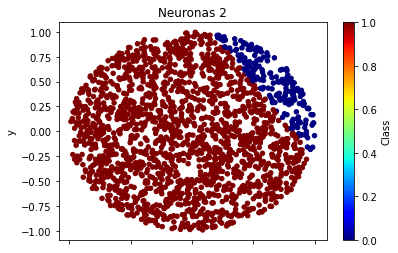

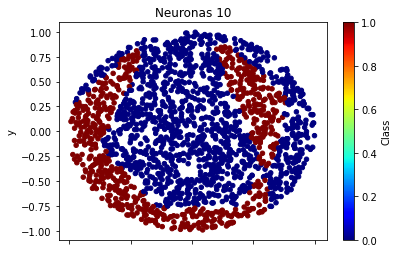

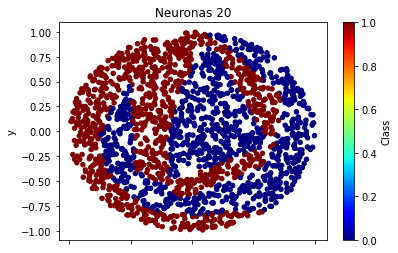

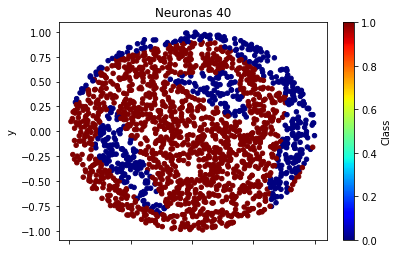

In [31]:
def ej1():
    train = espirales_anidadas.generate_points_c(600)
    train_data = train.loc[ : , ['x', 'y'] ]
    
    train_target = train.loc[:, 'Class']
    test = espirales_anidadas.generate_points_c(2000)
    X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=0)
    X_test = test.loc[ : , ['x', 'y'] ]
    y_test = test.loc[:, 'Class']

    evaluaciones = 1000
    epocas = 20
    eta = 0.1 # lr
    alfa = 0.9 # m

    n_neuronas = [2, 10, 20, 40]

    for nn in n_neuronas:
        r = MLPClassifier(hidden_layer_sizes=(nn,), 
            activation='logistic', 
            solver='sgd', 
            alpha=0.0, 
            batch_size=1, 
            learning_rate='constant', 
            learning_rate_init=eta,
            momentum=alfa,
            nesterovs_momentum=False,
            tol=0.0,
            warm_start=True,
            max_iter=epocas
        )
        red, error_train, error_val, error_test = entrenar_red_clasificacion(r, evaluaciones, X_train, y_train, X_val, y_val, test.loc[ : , ['x', 'y'] ], test.loc[:, 'Class'])
        y_pred_test = red.predict(test.loc[ : , ['x', 'y'] ])
        graficar_predicciones(test.loc[ : , ['x', 'y'] ], y_pred_test, 'Class', f"Neuronas {nn}")

ej1()


Conclusion:

8 minutos de ejecucion y predice como el *